# Ejercicio Cyberpuerta


1. Entrar a la página https://www.cyberpuerta.mx/ y buscar una categoría.

2. Realizar las peticiones HTTP pertinentes para obtener el código fuente de la página.

3. Analizar la páginas web para identificar los elementos relevantes.

4. Extraer los datos relevante de las páginas web.

5. Generar un DataFrame con los datos obtenidos.

6. Generar una gráfica para visualizar los datos.

In [7]:
import requests
from bs4 import BeautifulSoup
page = requests.get('https://www.cyberpuerta.mx/Nuevos-articulos/')
print(page)

<Response [200]>


In [8]:
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="es">
 <head>
  <link href="https://www.cyberpuerta.mx/out/generated/cms-pages.css?1593624763" rel="stylesheet" type="text/css"/>
  <link href="https://www.cyberpuerta.mx/out/cyberpuertaV5/src/css/em.selectbox.css?1690311918" rel="stylesheet" type="text/css"/>
  <link href="https://www.cyberpuerta.mx/out/cyberpuertaV5/src/css/oxwidget_headerlogin.css?1690311918" rel="stylesheet" type="text/css"/>
  <link href="https://www.cyberpuerta.mx/out/cyberpuertaV5/src/css/oxwidget_headernotice.css?1690311918" rel="stylesheet" type="text/css"/>
  <link href="https://www.cyberpuerta.mx/out/cyberpuertaV5/src/css/oxwidget_headercompare.css?1690311918" rel="stylesheet" type="text/css"/>
  <link href="https://www.cyberpuerta.mx/out/cyberpuertaV5/src/css/oxwidget_headerhelp.css?1690311918" rel="stylesheet" type="text/css"/>
  <link href="https://www.cyberpuerta.mx/out/cyberpuertaV5/src/css/oxwidget_headerminibasket.css?1690311918" rel="stylesheet" type="text/css"/>
  <link da

In [9]:
items = []
lista_items = soup.find_all('div', class_="emproduct_right")

for i in lista_items:
    item = i.text
    items.append(item)

items

['\n\nMemoria RAM Kingston ValueRAM DDR5, 5600MHz, 8GB, Non-ECC, CL46\n\n\n\nSKU: KVR56U46BS6-8\n\n\n\n\n\nTipo de memoria interna: DDR5\nMemoria interna: 8 GB\nDiseño de memoria: 1 x 8 GB\nVelocidad de memoria del reloj: 5600 MHz\nLatencia CAS: 46\n\u2003\n\n\n\n\n\n\n$589.00\n\n Costo de envío:\n$99.00\n\n            Disponibles:\n2\npzas.\n\n\n\n\n\n\n\nAgregar al carrito\n\n\n\n\n\n\n\n\n\nVer Comparación (0)            \n\n\n\n\n\nComparar\n\n\n \n\n\n\n\n\n',
 '\n\nSwiss Mobility Mochila NSB10710 para Laptop 17", Azul\n\n\n\nSKU: NSB10710\n\n\n\n\n\nTamaño máximo de pantalla: 43,2 cm (17") \nMateriales: Poliéster \n\n\n\n\n\n\n\n$549.00\n\n Costo de envío:\n$139.00\n\n            Disponibles:\n1792\npzas.\n\n\n\n\n\n\n\nAgregar al carrito\n\n\n\n\n\n\n\n\n\nVer Comparación (0)            \n\n\n\n\n\nComparar\n\n\n \n\n\n\n\n\n',
 '\n\nSecuritag Tarjetas PVC de Proximidad MIFARE 672142733, 8.5 x 5.4cm, Blanco, Paquete de 200 Piezas\n\n\n\nSKU: 672142733\n\n\n\n\n\nMateriales: Clor

In [10]:
print(lista_items)

[<div class="emproduct_right">
<a class="emproduct_right_title emsmoothtext cpGaProdproductList-1 productList-1" href="https://www.cyberpuerta.mx/Computo-Hardware/Memorias-RAM-y-Flash/Memorias-RAM-para-PC/Memoria-RAM-Kingston-ValueRAM-DDR5-5600MHz-8GB-Non-ECC-CL46.html" id="productList-1" style="margin-right:40px" title="Memoria RAM Kingston ValueRAM DDR5, 5600MHz, 8GB, Non-ECC, CL46">
Memoria RAM Kingston ValueRAM DDR5, 5600MHz, 8GB, Non-ECC, CL46
</a>
<div class="clear emproduct_right_artnum_review">
<div class="emproduct_right_artnum">
SKU: KVR56U46BS6-8
</div>
</div>
<div class="clear emproduct_left_attribute_price">
<div class="emproduct_right_attribute">
<ul>
<li><span class="title">Tipo de memoria interna</span><span class="content">: DDR5</span></li>
<li><span class="title">Memoria interna</span><span class="content">: 8 GB</span></li>
<li><span class="title">Diseño de memoria</span><span class="content">: 1 x 8 GB</span></li>
<li><span class="title">Velocidad de memoria del re

In [2]:
data=[]
def procesar_pagina(soup):

    titulos=[]
    for item in lista_items:
        titulo = item.a["title"]
        titulos.append(titulo.strip())

    skus = []
    sku_items = soup.find_all('div', class_="emproduct_right_artnum")
    for item in sku_items:
        sku = item.text.strip()
        skus.append(sku)

    caracteristicas = []
    lista_caracteristicas = soup.find_all('div', class_="emproduct_right_attribute")
    for item in lista_caracteristicas:
        caracteristica = item.text.strip()
        caracteristicas.append(caracteristica)

    precios = []
    lista_precios = soup.find_all('label', class_="price")
    for item in lista_precios:
        precio = item.text.strip()
        precios.append(precio)

    precios_envios = []
    lista_precios_envio = soup.find_all('span', class_="deliveryvalue")
    for item in lista_precios_envio:
        envio = item.text
        precios_envios.append(envio)


    disponibles = []
    lista_disponibles = soup.find_all('div', class_="emstock")
    for item in lista_disponibles:
        disponible = item.span.text
        disponibles.append(disponible)

    for i in range(len(titulos)):
        data.append({
            "Producto":titulos[i],
            "Características":caracteristicas[i],
            "Sku":skus[i],
            "Precio":precios[i],
            "Envio":precios_envios[i],
            "En existencia":disponibles[i]})

In [3]:
def obtener_contenido_pagina(url):
    response = requests.get(url)
    return response.content

In [4]:
def analizar_contenido_html(html):
    return BeautifulSoup(html,"html.parser")

In [5]:
def manejar_paginacion(url_base,num_paginas):
    for i in range(1,num_paginas+1):
        url = url_base +str(i)+"/"
        contenido_pagina = obtener_contenido_pagina(url)
        soup = analizar_contenido_html(contenido_pagina)
        procesar_pagina(soup)

In [6]:
url_base = "https://www.cyberpuerta.mx/Nuevos-articulos/"
num_paginas = 12
manejar_paginacion(url_base,num_paginas)

NameError: name 'requests' is not defined

In [50]:
import pandas as pd
df=pd.DataFrame(data)
df

,Producto,Características,Sku,Precio,Envio,En existencia
0,"Memoria RAM Kingston ValueRAM DDR5, 5600MHz, 8...",\n\nTipo de memoria interna: DDR5\nMemoria int...,\nSKU: KVR56U46BS6-8\n,\n$589.00\n,$99.00,2
1,Swiss Mobility Mochila NSB10710 para Laptop 17,"\n\nTamaño máximo de pantalla: 43,2 cm (17"") \...",\nSKU: NSB10710\n,\n$549.00\n,$139.00,1792
2,Securitag Tarjetas PVC de Proximidad MIFARE 67...,\n\nMateriales: Cloruro de polivinilo (PVC)\nC...,\nSKU: 672142733\n,"\n$1,829.00\n",$99.00,41995
3,"Hisense Aire Acondicionado Minisplit AU362VQ, ...","\n\nFunciones: Enfriamiento, Calentar\nTipo: U...",\nSKU: AU362VQW\n,"\n$24,889.00\n",$799.00,2
4,Krubs Cafetera para Expreso/Capuchino EA825511...,\n\n Tipo de Producto: Máquina de café expreso...,\nSKU: EA825511\n,"\n$16,919.00\n",$154.00,1
...,...,...,...,...,...,...
187,"Hoffman PDU para Rack 1U DP1E2663030MT, 30A, 2...","\n\nDiagonal de la pantalla: 16.3 cm (6.4"") Pa...",\nSKU: SM-G990BLVDEUA\n,"\n$16,079.00\n",$99.00,Producto agotado
188,LinkedPRO Abrazadera para Sujeción de Bajada e...,"\n\nDiagonal de la pantalla: 16.8 cm (6.6"") Pa...",\nSKU: SM-S916BLIJTPA\n,"\n$21,519.00\n",$99.00,Producto agotado
189,"3nStar TCM008VH LED TouchScreen 15'', Negro","\n\nDiagonal de la pantalla: 16.8 cm (6.6"") Pa...",\nSKU: SM-S916BZGJTPA\n,"\n$21,519.00\n",$99.00,Producto agotado
190,TCL Smart TV LED S350G 32,\n\n Memoria interna: 4 GB\n Tarjetas de memor...,\nSKU: EDA52-11AE64N21RK\n,"\n$11,899.00\n",$99.00,Producto agotado


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Producto         192 non-null    object
 1   Características  192 non-null    object
 2   Sku              192 non-null    object
 3   Precio           192 non-null    object
 4   Envio            192 non-null    object
 5   En existencia    192 non-null    object
dtypes: object(6)
memory usage: 9.1+ KB


In [52]:
df[df["En existencia"]=="Producto agotado"]

,Producto,Características,Sku,Precio,Envio,En existencia
185,"Hoffman Gabinete para Pared CSD302412W, 61 x 7...","\n\n Diagonal de la pantalla: 39,6 cm (15.6"") ...",\nSKU: 4NK1YS-IBC\n,"\n$27,039.00\n",$99.00,Producto agotado
186,Hoffman Rejilla para Respiración de Gabinete c...,\n\nCapacidad: 256 GB\nTipo de tarjeta flash: ...,\nSKU: SDSQXAO-256G-GN6ZG\n,\n$679.00\n,$99.00,Producto agotado
187,"Hoffman PDU para Rack 1U DP1E2663030MT, 30A, 2...","\n\nDiagonal de la pantalla: 16.3 cm (6.4"") Pa...",\nSKU: SM-G990BLVDEUA\n,"\n$16,079.00\n",$99.00,Producto agotado
188,LinkedPRO Abrazadera para Sujeción de Bajada e...,"\n\nDiagonal de la pantalla: 16.8 cm (6.6"") Pa...",\nSKU: SM-S916BLIJTPA\n,"\n$21,519.00\n",$99.00,Producto agotado
189,"3nStar TCM008VH LED TouchScreen 15'', Negro","\n\nDiagonal de la pantalla: 16.8 cm (6.6"") Pa...",\nSKU: SM-S916BZGJTPA\n,"\n$21,519.00\n",$99.00,Producto agotado
190,TCL Smart TV LED S350G 32,\n\n Memoria interna: 4 GB\n Tarjetas de memor...,\nSKU: EDA52-11AE64N21RK\n,"\n$11,899.00\n",$99.00,Producto agotado
191,Laptop Dell Latitude 3420 14,\n\nFactor de forma: Midi-Tower\nTarjetas madr...,\nSKU: 385ZD10.0003\n,"\n$1,229.00\n",$154.00,Producto agotado


In [56]:
df.loc[[187,188],"En existencia"] = "0"
df

,Producto,Características,Sku,Precio,Envio,En existencia
0,"Memoria RAM Kingston ValueRAM DDR5, 5600MHz, 8...",\n\nTipo de memoria interna: DDR5\nMemoria int...,\nSKU: KVR56U46BS6-8\n,\n$589.00\n,$99.00,2
1,Swiss Mobility Mochila NSB10710 para Laptop 17,"\n\nTamaño máximo de pantalla: 43,2 cm (17"") \...",\nSKU: NSB10710\n,\n$549.00\n,$139.00,1792
2,Securitag Tarjetas PVC de Proximidad MIFARE 67...,\n\nMateriales: Cloruro de polivinilo (PVC)\nC...,\nSKU: 672142733\n,"\n$1,829.00\n",$99.00,41995
3,"Hisense Aire Acondicionado Minisplit AU362VQ, ...","\n\nFunciones: Enfriamiento, Calentar\nTipo: U...",\nSKU: AU362VQW\n,"\n$24,889.00\n",$799.00,2
4,Krubs Cafetera para Expreso/Capuchino EA825511...,\n\n Tipo de Producto: Máquina de café expreso...,\nSKU: EA825511\n,"\n$16,919.00\n",$154.00,1
...,...,...,...,...,...,...
187,"Hoffman PDU para Rack 1U DP1E2663030MT, 30A, 2...","\n\nDiagonal de la pantalla: 16.3 cm (6.4"") Pa...",\nSKU: SM-G990BLVDEUA\n,"\n$16,079.00\n",$99.00,0
188,LinkedPRO Abrazadera para Sujeción de Bajada e...,"\n\nDiagonal de la pantalla: 16.8 cm (6.6"") Pa...",\nSKU: SM-S916BLIJTPA\n,"\n$21,519.00\n",$99.00,0
189,"3nStar TCM008VH LED TouchScreen 15'', Negro","\n\nDiagonal de la pantalla: 16.8 cm (6.6"") Pa...",\nSKU: SM-S916BZGJTPA\n,"\n$21,519.00\n",$99.00,0
190,TCL Smart TV LED S350G 32,\n\n Memoria interna: 4 GB\n Tarjetas de memor...,\nSKU: EDA52-11AE64N21RK\n,"\n$11,899.00\n",$99.00,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Producto         192 non-null    object
 1   Características  192 non-null    object
 2   Sku              192 non-null    object
 3   Precio           192 non-null    object
 4   Envio            192 non-null    object
 5   En existencia    192 non-null    object
dtypes: object(6)
memory usage: 9.1+ KB


In [40]:
df["Precio"]

0         \n$589.00\n
1         \n$549.00\n
2       \n$1,829.00\n
3      \n$24,889.00\n
4      \n$16,919.00\n
            ...      
187    \n$16,079.00\n
188    \n$21,519.00\n
189    \n$21,519.00\n
190    \n$11,899.00\n
191     \n$1,229.00\n
Name: Precio, Length: 192, dtype: object

In [41]:
df["Envio"]

0       $99.00
1      $139.00
2       $99.00
3      $799.00
4      $154.00
        ...   
187     $99.00
188     $99.00
189     $99.00
190     $99.00
191    $154.00
Name: Envio, Length: 192, dtype: object

In [83]:
import matplotlib as plt
import matplotlib.pyplot as plt


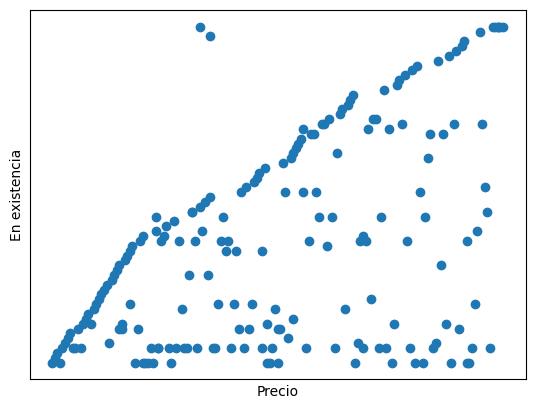

In [82]:
plt.scatter(df["Precio"],df["En existencia"])
plt.ylabel('En existencia')
plt.xlabel('Precio')
plt.xticks([])
plt.yticks([])
plt.show()

In [67]:
df["Precio"].max()

'\n$989.00\n'

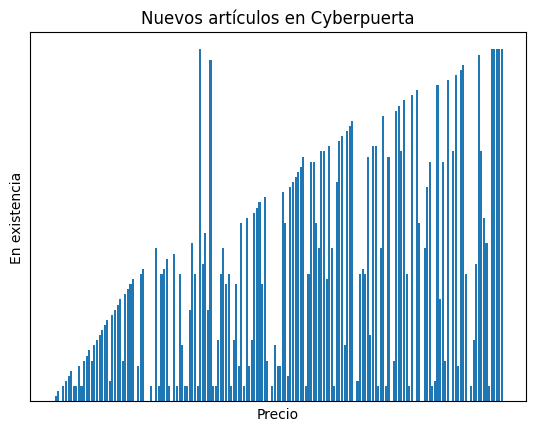

In [79]:
plt.bar(df["Precio"],df["En existencia"])
plt.ylabel('En existencia')
plt.xlabel('Precio')
plt.title('Nuevos artículos en Cyberpuerta')
plt.xticks([])
plt.yticks([])
plt.show()

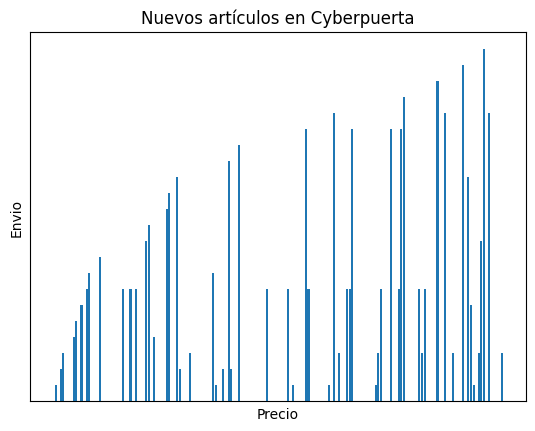

In [80]:
plt.bar(df["Precio"],df["Envio"])
plt.ylabel('Envio')
plt.xlabel('Precio')
plt.title('Nuevos artículos en Cyberpuerta')
plt.xticks([])
plt.yticks([])
plt.show()